In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import validation_curve


### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
df = pd.read_csv(path_train)
df1 = pd.read_csv(path_test)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.15,0.38,2.2,0.047,33.0,96.0,0.99280,3.13,0.39,10.400000
1,7.2,0.26,0.32,10.4,0.062,23.0,114.0,0.99660,3.23,0.49,10.500000
2,6.2,0.36,0.38,3.2,0.031,20.0,89.0,0.98956,3.06,0.33,12.000000
3,8.6,0.36,0.26,11.1,0.030,43.5,171.0,0.99480,3.03,0.49,12.000000
4,7.4,0.27,0.52,15.7,0.054,36.0,139.0,0.99788,3.04,0.62,10.033333
...,...,...,...,...,...,...,...,...,...,...,...
571,7.3,0.36,0.34,14.8,0.057,46.0,173.0,0.99751,3.14,0.57,10.200000
572,6.4,0.28,0.41,6.8,0.045,61.0,216.0,0.99520,3.09,0.46,9.400000
573,6.4,0.24,0.32,14.9,0.047,54.0,162.0,0.99680,3.28,0.50,10.200000
574,5.5,0.15,0.32,14.0,0.031,16.0,99.0,0.99437,3.26,0.38,11.500000


In [8]:
df_train=df.drop_duplicates()
df_test=df1.drop_duplicates()
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.15,0.38,2.2,0.047,33.0,96.0,0.99280,3.13,0.39,10.400000
1,7.2,0.26,0.32,10.4,0.062,23.0,114.0,0.99660,3.23,0.49,10.500000
2,6.2,0.36,0.38,3.2,0.031,20.0,89.0,0.98956,3.06,0.33,12.000000
3,8.6,0.36,0.26,11.1,0.030,43.5,171.0,0.99480,3.03,0.49,12.000000
4,7.4,0.27,0.52,15.7,0.054,36.0,139.0,0.99788,3.04,0.62,10.033333
...,...,...,...,...,...,...,...,...,...,...,...
571,7.3,0.36,0.34,14.8,0.057,46.0,173.0,0.99751,3.14,0.57,10.200000
572,6.4,0.28,0.41,6.8,0.045,61.0,216.0,0.99520,3.09,0.46,9.400000
573,6.4,0.24,0.32,14.9,0.047,54.0,162.0,0.99680,3.28,0.50,10.200000
574,5.5,0.15,0.32,14.0,0.031,16.0,99.0,0.99437,3.26,0.38,11.500000


In [9]:
df_train['quality'] = (df_train['quality'] >= 7).astype(int)
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,0
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,0
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,1
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,1


In [10]:
df_data=df_train.drop(['quality'],axis=1)
df_target=df_train.quality
X_train,X_test,y_train,y_test=train_test_split(df_data,df_target,random_state=12)
knk = KNeighborsClassifier()
knk.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid    

/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-pack

/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['none'],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [12]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,24,25,26,28,29,30,31,9,21,1,...,22,8,20,27,23,11,3,7,15,19
mean_fit_time,0.008265,0.005155,0.006666,0.009197,0.006819,0.008763,0.033946,0.003016,0.00635,0.006662,...,0.006647,0.002963,0.010999,0.01448,0.010595,0.002821,0.004881,0.00612,0.004095,0.004442
std_fit_time,0.000682,0.000174,0.000214,0.001047,0.000191,0.000398,0.002854,0.000051,0.001075,0.000683,...,0.001395,0.000152,0.00292,0.000644,0.002403,0.00013,0.000058,0.000136,0.000135,0.00014
mean_score_time,0.001268,0.001215,0.001245,0.00136,0.001315,0.001272,0.00141,0.001132,0.001383,0.001129,...,0.001283,0.001142,0.001342,0.001572,0.001459,0.001237,0.001274,0.001321,0.001256,0.001423
std_score_time,0.00006,0.00005,0.000037,0.000146,0.000152,0.000025,0.000056,0.00005,0.000041,0.000027,...,0.00011,0.000037,0.000081,0.000267,0.000022,0.000039,0.000091,0.00005,0.000033,0.000218
param_clf__penalty,none,none,none,none,none,none,none,l2,l1,l2,...,l1,l2,l1,none,l1,l2,l2,l2,l2,l2
param_clf__solver,lbfgs,lbfgs,lbfgs,newton-cg,newton-cg,newton-cg,newton-cg,liblinear,liblinear,newton-cg,...,liblinear,liblinear,liblinear,lbfgs,liblinear,liblinear,newton-cg,lbfgs,sag,saga
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),StandardScaler(),StandardScaler(),StandardScaler(),...,RobustScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...",...,"{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ..."
split0_test_score,0.78866,0.78866,0.78866,0.78866,0.78866,0.78866,0.798969,0.791237,0.78866,0.791237,...,0.786082,0.780928,0.786082,0.773196,0.626289,0.626289,0.626289,0.626289,0.626289,0.626289
split1_test_score,0.783505,0.783505,0.783505,0.783505,0.783505,0.783505,0.783505,0.780928,0.780928,0.778351,...,0.773196,0.757732,0.755155,0.75,0.618557,0.626289,0.626289,0.626289,0.626289,0.626289


<Axes: >

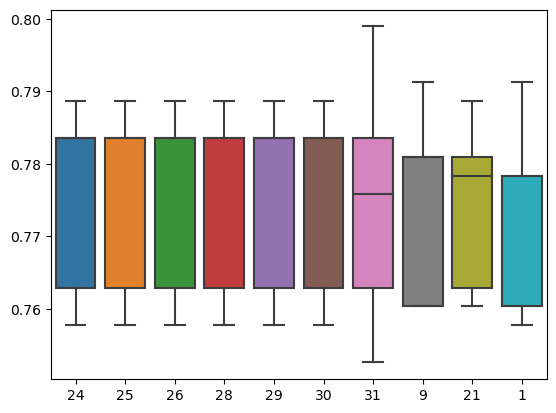

In [13]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl)

In [14]:
grid.cv_results_['params'][24]

{'clf__penalty': 'none',
 'clf__solver': 'lbfgs',
 'preprocessing': MinMaxScaler()}

In [15]:
pipe_best = make_pipeline(Normalizer(), LogisticRegression(solver = 'lbfgs', penalty = 'none') )

pipe_best.fit(X_train,y_train)
y_pred_best = pipe_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       291
           1       0.63      0.44      0.52       141

    accuracy                           0.73       432
   macro avg       0.70      0.66      0.67       432
weighted avg       0.72      0.73      0.72       432



/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Блок предсказания с использованием тестового набора

In [17]:
print('Оценка на тренировочном наборе: ', pipe_best.score(X_train,y_train))
print('Оценка на тестовом наборе: ', pipe_best.score(X_test,y_test))

Оценка на тренировочном наборе:  0.7432327919566899
Оценка на тестовом наборе:  0.7337962962962963


In [18]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = pipe_best.predict(X_test)

In [19]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)

ValueError: Found input variables with inconsistent numbers of samples: [576, 432]